In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import pyplot as plt
import seaborn as sns
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Wstepna analiza zebranych danych (dodac to co bylo robione na poczatku)

In [2]:
df = pd.read_csv("total_data_players_20-21.csv")
df=df.drop(["Unnamed: 0"],axis=1)
(df.columns)

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [3]:
for x in range(0,len(df.index)):
    if df.Pos.iloc[x] == "PF-SF":
        df.Pos.iloc[x] = "PF"
    elif df.Pos.iloc[x] == "SF-PF":
        df.Pos.iloc[x] = "SF"
    elif df.Pos.iloc[x] == "SG-PG":
        df.Pos.iloc[x] = "SG"
    elif df.Pos.iloc[x] == "PG-SG":
        df.Pos.iloc[x] = "PG"
    elif df.Pos.iloc[x] == "C-PF":
        df.Pos.iloc[x] = "C"
    elif df.Pos.iloc[x] == "PF-C":
        df.Pos.iloc[x] = "PF"
    elif df.Pos.iloc[x] == "SF-SG":
        df.Pos.iloc[x] = "SF"
    elif df.Pos.iloc[x] == "SG-SF":
        df.Pos.iloc[x] = "SG"
    

C:\Users\Kuba\anaconda3\envs\py38_aw_wne\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
list(set(df.Pos))

['C', 'SG', 'PF', 'PG', 'SF']

In [5]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,0.614,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
2,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,0.570,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
3,Ty-Shon Alexander,SG,22,PHO,15,0,3.1,0.2,0.8,0.250,...,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
4,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,0.419,...,0.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0


## Proba na zmiennych relatywnych

In [6]:
df.drop(['G','GS','FG','FGA','3P','3PA','2P','2PA','FT','FTA','TRB','PTS'], axis='columns', inplace=True)

In [7]:
df.describe()

,Age,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,25.614314,20.620875,0.449581,0.317421,0.513654,0.518716,0.756358,0.819483,2.913718,2.102187,0.645726,0.417097,1.136382,1.687674
std,4.116137,8.886586,0.086424,0.120947,0.102357,0.084600,0.137094,0.685782,1.775741,1.874343,0.382090,0.393809,0.828458,0.729273
min,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,13.750000,0.404500,0.278000,0.466000,0.485000,0.693500,0.400000,1.600000,0.800000,0.400000,0.200000,0.600000,1.100000
50%,25.000000,20.500000,0.442000,0.342000,0.513000,0.525000,0.778000,0.600000,2.600000,1.500000,0.600000,0.300000,0.900000,1.700000
75%,28.000000,28.000000,0.490000,0.389500,0.572500,0.565000,0.845000,1.100000,3.800000,2.800000,0.900000,0.600000,1.500000,2.200000
max,38.000000,37.600000,0.769000,1.000000,1.000000,0.846000,1.000000,4.100000,10.100000,11.700000,2.100000,3.400000,4.800000,4.000000


In [8]:
df.groupby(["Pos"]).mean()

,Age,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF
Pos,,,,,,,,,,,,,,
C,26.441860,19.783721,0.533605,0.239023,0.581384,0.563605,0.700279,1.708140,4.146512,1.404651,0.524419,0.887209,1.070930,2.083721
PF,25.701923,19.693269,0.454337,0.312712,0.523596,0.523413,0.736250,0.923077,3.218269,1.629808,0.571154,0.431731,0.997115,1.679808
PG,25.928571,21.437755,0.413184,0.341408,0.459500,0.483990,0.792786,0.466327,2.393878,3.719388,0.789796,0.234694,1.510204,1.520408
SF,25.362637,20.515385,0.439604,0.335769,0.528626,0.520264,0.753725,0.686813,2.814286,1.626374,0.656044,0.345055,0.965934,1.603297
SG,24.903226,21.411290,0.423403,0.343323,0.490153,0.509952,0.785258,0.492742,2.287097,2.053226,0.670968,0.275806,1.128226,1.613710


In [9]:
df.groupby(["Tm"]).mean()

,Age,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF
Tm,,,,,,,,,,,,,,
ATL,24.533333,20.546667,0.425867,0.284667,0.474533,0.495200,0.811067,0.626667,2.606667,1.920000,0.633333,0.326667,1.046667,1.826667
BOS,24.000000,21.561538,0.454000,0.304000,0.514462,0.531385,0.775308,0.953846,2.915385,2.223077,0.692308,0.407692,1.223077,1.761538
BRK,26.937500,20.537500,0.461500,0.295312,0.510062,0.527500,0.775375,0.793750,3.087500,2.218750,0.581250,0.443750,1.106250,1.575000
CHI,25.909091,20.881818,0.461091,0.303000,0.549091,0.527909,0.703091,0.663636,2.709091,2.463636,0.581818,0.281818,1.309091,1.590909
CHO,24.071429,22.142857,0.463357,0.275786,0.518214,0.522643,0.730857,0.985714,3.114286,2.421429,0.735714,0.421429,1.307143,1.671429
CLE,25.666667,20.793333,0.403000,0.255467,0.482267,0.461400,0.715267,0.700000,2.586667,2.266667,0.673333,0.273333,1.173333,1.453333
DAL,25.333333,19.280000,0.458200,0.272333,0.537800,0.516200,0.740467,0.806667,2.840000,1.760000,0.513333,0.360000,0.893333,1.546667
DEN,25.230769,20.653846,0.459692,0.364923,0.536077,0.541462,0.782154,0.807692,2.838462,2.300000,0.669231,0.353846,1.100000,1.523077
DET,23.692308,20.338462,0.462846,0.313923,0.506385,0.529769,0.735846,0.800000,2.723077,1.915385,0.561538,0.438462,1.253846,1.815385


In [10]:
corr = df.corr()

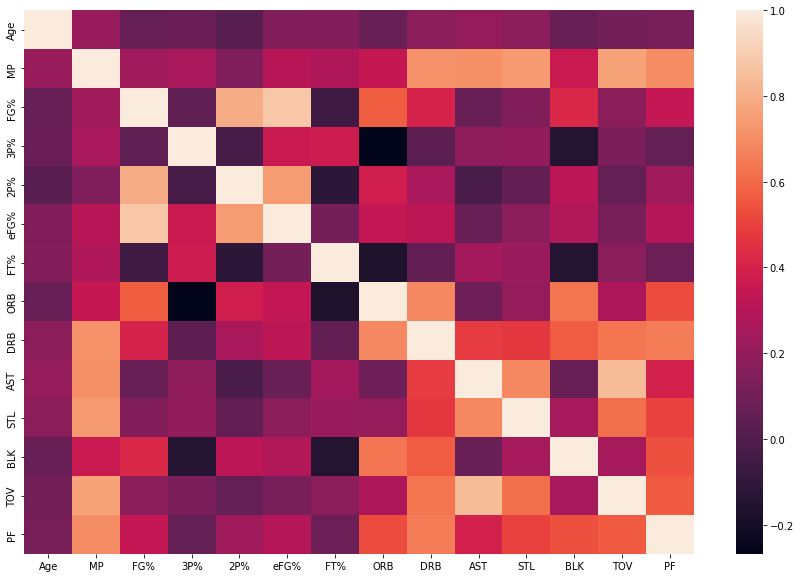

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.savefig("heatmap.jpeg")



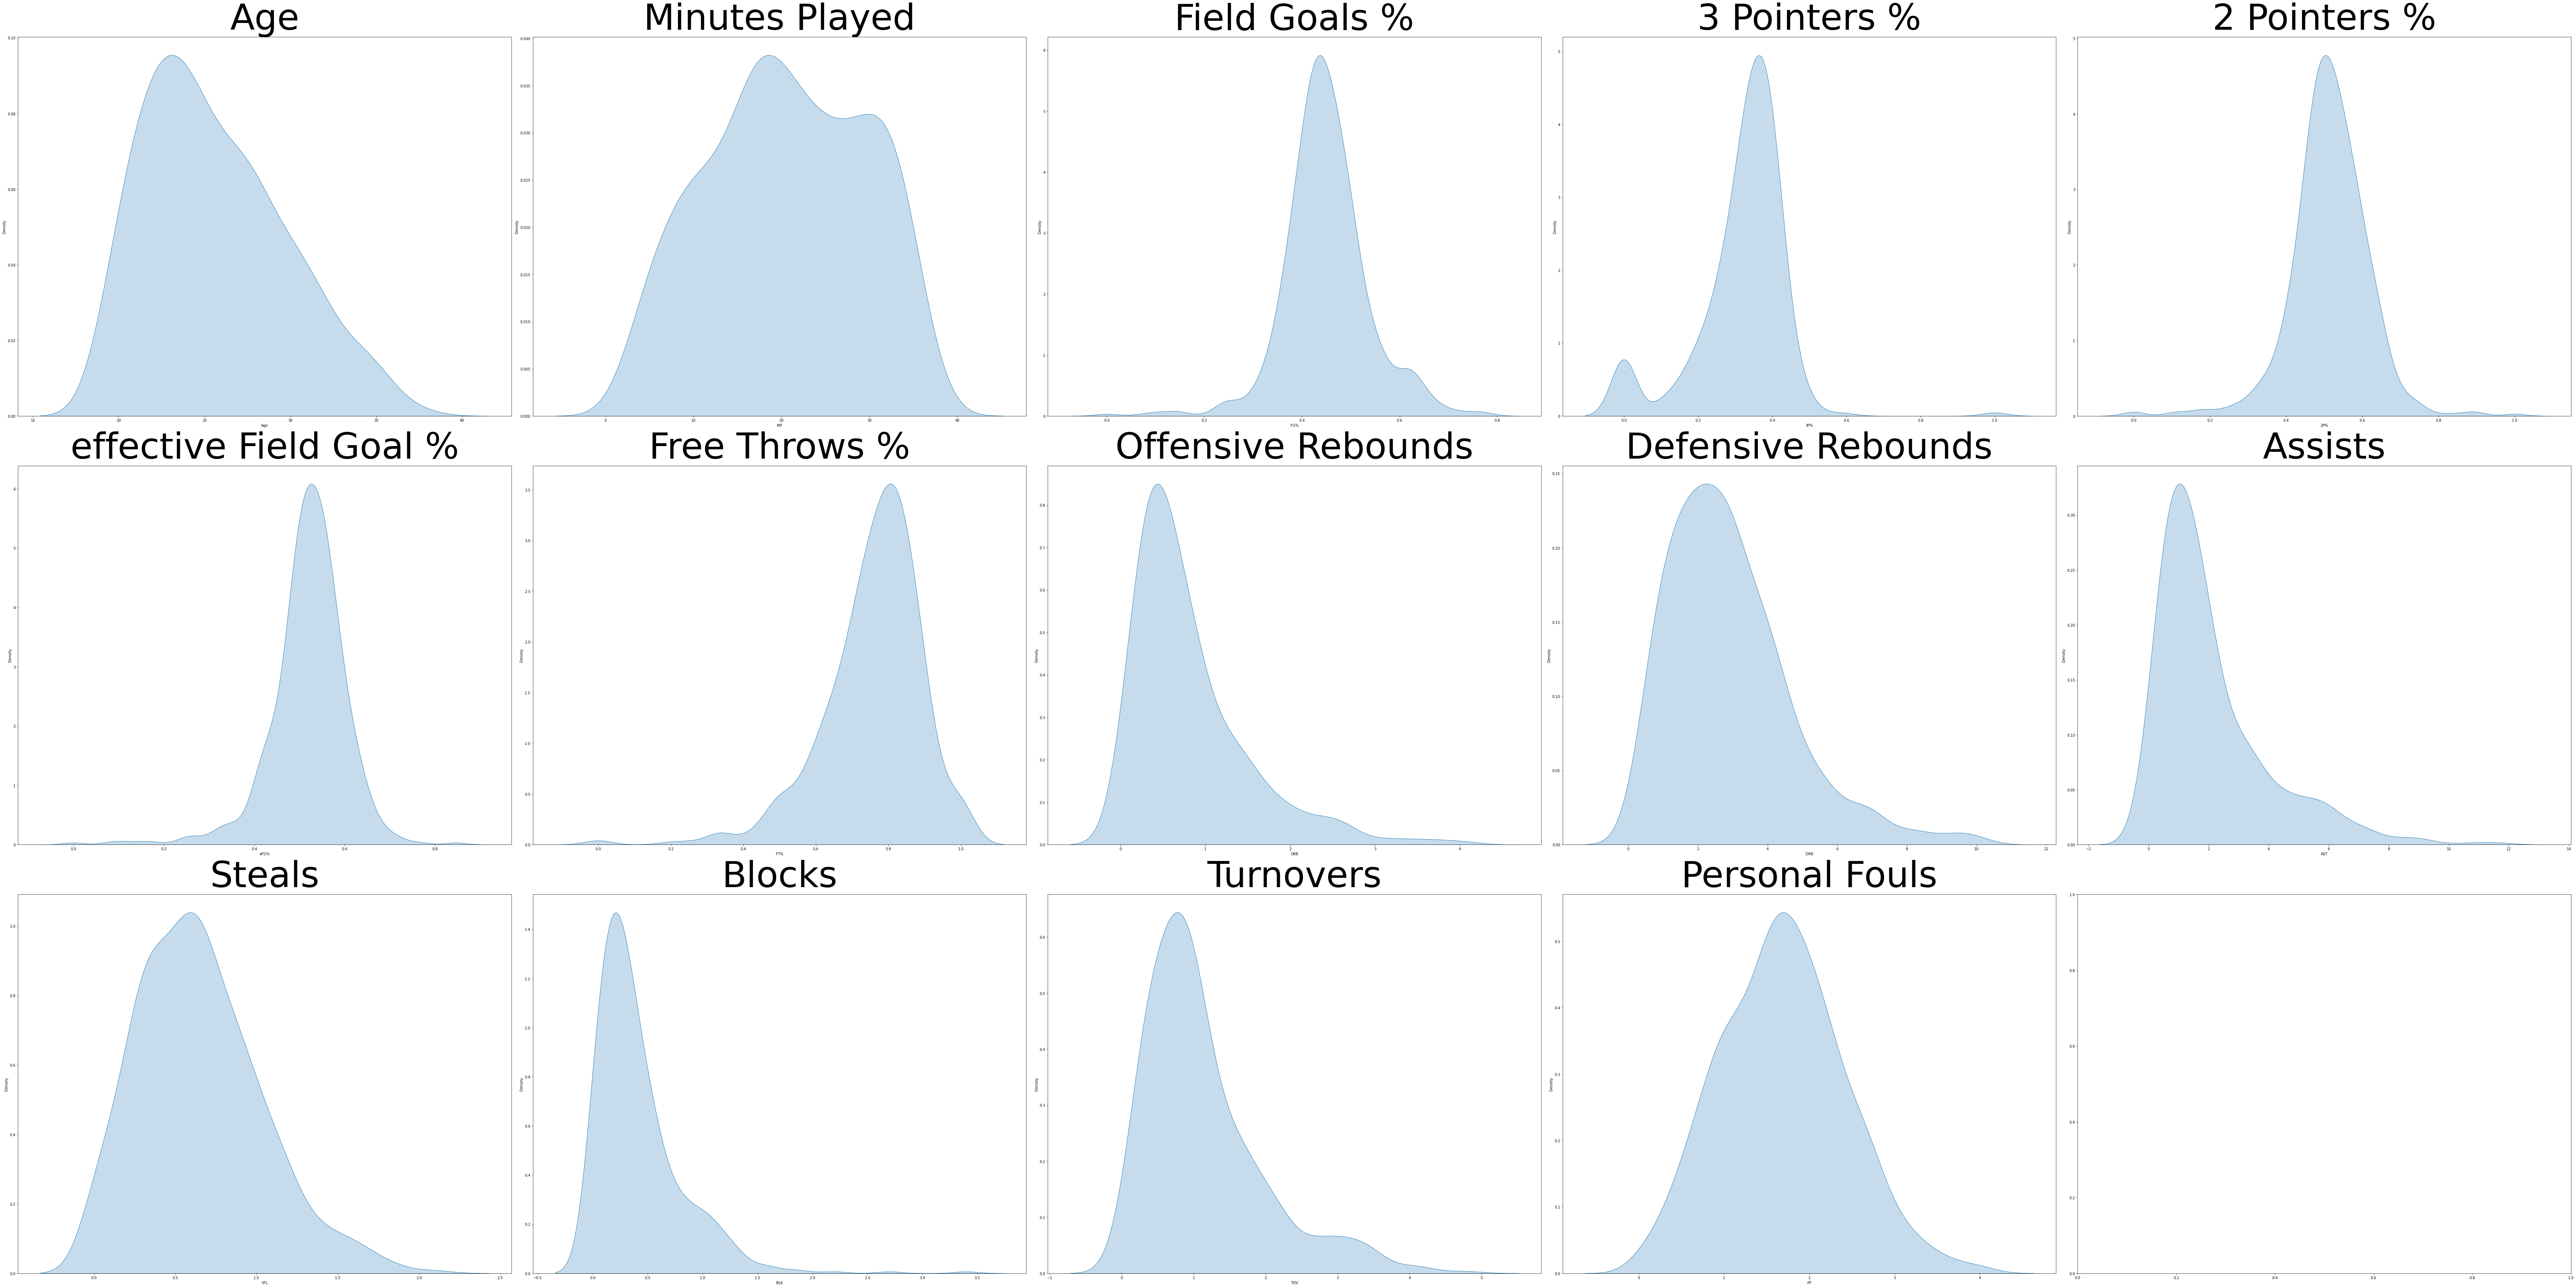

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 5, figsize = (100, 50))
#Dodam tytuly
a = sns.kdeplot(df["Age"], shade=True, ax = ax1[0] ).set_title("Age", fontsize=100)
b = sns.kdeplot(df["MP"], shade=True, ax = ax1[1]).set_title("Minutes Played", fontsize = 100)
c = sns.kdeplot(df["FG%"], shade=True, ax = ax1[2]).set_title("Field Goals %", fontsize = 100)
d = sns.kdeplot(df["3P%"], shade=True, ax = ax1[3]).set_title("3 Pointers %", fontsize = 100)
e = sns.kdeplot(df["2P%"], shade=True, ax = ax1[4]).set_title("2 Pointers %", fontsize = 100)
f = sns.kdeplot(df["eFG%"], shade=True, ax = ax2[0]).set_title("effective Field Goal %", fontsize = 100)
g = sns.kdeplot(df["FT%"], shade=True, ax = ax2[1]).set_title("Free Throws %", fontsize = 100)
h = sns.kdeplot(df["ORB"], shade=True, ax = ax2[2]).set_title("Offensive Rebounds", fontsize = 100)
i = sns.kdeplot(df["DRB"], shade=True, ax = ax2[3]).set_title("Defensive Rebounds", fontsize = 100)
j = sns.kdeplot(df["AST"], shade=True, ax = ax2[4]).set_title("Assists", fontsize = 100)
k = sns.kdeplot(df["STL"], shade=True, ax = ax3[0]).set_title("Steals", fontsize = 100)
l = sns.kdeplot(df["BLK"], shade=True, ax = ax3[1]).set_title("Blocks", fontsize = 100)
m = sns.kdeplot(df["TOV"], shade=True, ax = ax3[2]).set_title("Turnovers", fontsize = 100)
n = sns.kdeplot(df["PF"], shade=True, ax = ax3[3]).set_title("Personal Fouls", fontsize = 100)
plt.tight_layout()
plt.savefig("rozkłady_model_1_bw.png")

In [13]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%',
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF'],
      dtype='object')

In [14]:
df = df.drop(["Tm","Pos"], axis=1)

In [15]:
#Data Centralization
df_ind_col=list(df.columns[1:len(df.columns)])
df_ind_col

for i in df_ind_col:
    df[i] = df[i]-np.mean(df[i])

df

,Player,Age,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF
0,Precious Achiuwa,-4.614314,-8.520875,0.094419,-0.317421,0.032346,0.025284,-0.247358,0.380517,-0.713718,-1.602187,-0.345726,0.082903,-0.436382,-0.187674
1,Steven Adams,1.385686,7.079125,0.164419,-0.317421,0.106346,0.095284,-0.312358,2.880517,2.286282,-0.202187,0.254274,0.282903,0.163618,0.212326
2,Bam Adebayo,-2.614314,12.879125,0.120419,-0.067421,0.059346,0.052284,0.042642,1.380517,3.786282,3.297813,0.554274,0.582903,1.463618,0.612326
3,Ty-Shon Alexander,-3.614314,-17.520875,-0.199581,-0.095421,-0.180654,-0.185716,-0.256358,-0.719483,-2.413718,-1.702187,-0.645726,-0.317097,-0.936382,-1.587674
4,Nickeil Alexander-Walker,-3.614314,1.279125,-0.030581,0.029579,-0.028654,-0.016716,-0.029358,-0.519483,-0.113718,0.097813,0.354274,0.082903,0.363618,0.212326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Moritz Wagner,-2.614314,-4.620875,0.004419,0.023579,0.015346,0.003284,0.059642,-0.219483,-0.313718,-1.002187,-0.045726,-0.017097,-0.136382,0.712326
499,Brad Wanamaker,5.385686,-3.320875,-0.064581,-0.129421,-0.050654,-0.107716,0.134642,-0.519483,-1.513718,0.797813,0.054274,-0.217097,0.063618,-0.187674
500,Lou Williams,8.385686,0.979125,-0.039581,0.081579,-0.099654,-0.054716,0.110642,-0.519483,-1.113718,1.297813,0.054274,-0.317097,0.463618,-0.787674
501,D.J. Wilson,-1.614314,-8.220875,-0.044581,0.027579,-0.044654,-0.024716,-0.076358,-0.219483,-0.313718,-1.402187,-0.345726,0.082903,-0.536382,-0.387674


In [16]:
# Checking for Multicollinearity
#1st cut
df_ind=df.drop(["Player"], axis='columns')


vif_data = pd.DataFrame()
vif_data["feature"] = df_ind_col

vif_data["VIF"] = [variance_inflation_factor(df_ind.values, i)
                          for i in range(len(df_ind.columns))]

print(vif_data)

   feature        VIF
0      Age   1.159801
1       MP   6.076652
2      FG%  11.300689
3      3P%   2.188435
4      2P%   3.171465
5     eFG%  10.998112
6      FT%   1.323259
7      ORB   3.984402
8      DRB   4.280595
9      AST   5.199162
10     STL   2.640969
11     BLK   2.037667
12     TOV   5.315723
13      PF   2.657150


In [17]:
#2nd cut

df_ind=df_ind.drop(["eFG%"], axis='columns')

vif_data2 = pd.DataFrame()
vif_data2["feature"] = df_ind.columns

vif_data2["VIF"] = [variance_inflation_factor(df_ind.values, i)
                          for i in range(len(df_ind.columns))]
vif_data2

,feature,VIF
0,Age,1.117097
1,MP,5.678198
2,FG%,3.976287
3,3P%,1.512650
4,2P%,2.971756
5,FT%,1.312724
6,ORB,3.743199
7,DRB,4.267770
8,AST,5.091604
9,STL,2.640801


In [18]:
df=df.drop(["eFG%"], axis=1)

In [19]:
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against 
# the identity matrix.

chi_square_value,p_value=calculate_bartlett_sphericity(df_ind)
kmo_all,kmo_model=calculate_kmo(df_ind)
print(chi_square_value, p_value)
print(kmo_model)
# The chisqrt is statistically significant thus we can use the Factorial Analysis.
# The KMO value is higher than 0.6 thus we can use the FA.

4248.988974439857 0.0
0.7890026554229189


C:\Users\Kuba\AppData\Roaming\Python\Python38\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [20]:
eigvals = np.linalg.eigvals(df.corr()) # macierz dodatnio okreslona
print(eigvals)

[5.01478967 2.50807263 1.2978595  0.95780423 0.8047367  0.62273722
 0.4726897  0.37798532 0.34744937 0.23349459 0.10859537 0.12120541
 0.13258029]


In [21]:
n_factors = 3
fa = FactorAnalyzer(rotation="varimax", is_corr_matrix = True, n_factors = n_factors, method = 'ml')
fa.fit(df.corr())
loadings = pd.DataFrame(np.column_stack((fa.loadings_, fa.get_uniquenesses())))
loadings.index = df.columns[1:15]
loadings.columns = [ "Factor" + str(i + 1) for i in range(n_factors)] + ["uniquenesses"] 
loadings

,Factor1,Factor2,Factor3,uniquenesses
Age,0.207989,0.037954,0.035803,0.954018
MP,0.852762,0.290493,0.083279,0.181476
FG%,0.101447,0.255873,0.958772,0.004994
3P%,0.300833,-0.327458,0.102046,0.791858
2P%,0.009860,0.156717,0.786829,0.356243
FT%,0.328280,-0.229436,-0.033266,0.838485
ORB,0.120875,0.814436,0.367224,0.187230
DRB,0.579545,0.655902,0.184113,0.200022
AST,0.893285,-0.041647,-0.010943,0.200187
STL,0.756824,0.114798,0.041031,0.412354


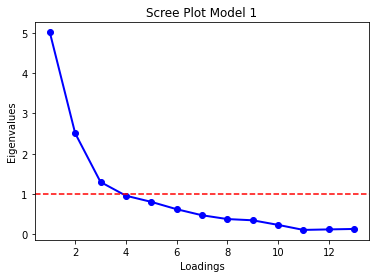

In [22]:
#pd.Series(fa.get_eigenvalues()[1]).plot()

plt.plot(np.arange(start=1, stop=len(eigvals) + 1), eigvals, "o-",linewidth=2, color="blue")
plt.axhline(1, linestyle="--", color="red")
plt.title("Scree Plot Model 1")
plt.xlabel("Loadings")
plt.ylabel("Eigenvalues")
plt.savefig("scree_model1")

In [24]:
n_factors = 3
df_final = df.drop("Age", axis=1)
eigvals = np.linalg.eigvals(df_final.corr()) # macierz dodatnio okreslona
print(eigvals)

[4.96876302 2.49323126 1.28877775 0.8138476  0.63083619 0.47310729
 0.38036679 0.34844475 0.23452926 0.13258269 0.11409061 0.12142279]


In [25]:
n_factors = 3
df_final = df.drop("Age", axis=1)
fa = FactorAnalyzer(rotation="varimax", is_corr_matrix = True, n_factors = n_factors, method = 'ml')
fa.fit(df_final.corr())
#pd.Series(fa.get_eigenvalues()[1]).plot()
loadings = pd.DataFrame(np.column_stack((fa.loadings_, fa.get_uniquenesses())))
loadings.index = df_final.columns[1:14]
loadings.columns = [ "Factor" + str(i + 1) for i in range(n_factors)] + ["uniquenesses"] 
loadings

,Factor1,Factor2,Factor3,uniquenesses
MP,0.766890,0.472495,0.058832,0.185167
FG%,0.057849,0.297143,0.950455,0.004994
3P%,0.363155,-0.249385,0.102741,0.795370
2P%,-0.012704,0.176057,0.782690,0.356239
FT%,0.365997,-0.151867,-0.035105,0.841750
ORB,-0.053602,0.829481,0.346530,0.189006
DRB,0.424085,0.771425,0.157170,0.200353
AST,0.882574,0.153252,-0.028527,0.196764
STL,0.712018,0.278756,0.022588,0.414816
BLK,0.005815,0.694094,0.228235,0.466108


In [26]:
0.766890**2  + 0.472495 **2 + 0.058832**2 - 1

-0.18516699865100006

## Predykcja Wersja 1 - Regresja liniowa

In [27]:
df2 = df_final
df2.set_index("Player", inplace=True)

In [28]:
df2 = df2.T
df2

Player,Precious Achiuwa,Steven Adams,Bam Adebayo,Ty-Shon Alexander,Nickeil Alexander-Walker,Grayson Allen,Kyle Anderson,Giannis Antetokounmpo,Thanasis Antetokounmpo,Carmelo Anthony,...,Matt Thomas,Sindarius Thornwell,Gary Trent Jr.,P.J. Tucker,Nikola Vučević,Moritz Wagner,Brad Wanamaker,Lou Williams,D.J. Wilson,Delon Wright
MP,-8.520875,7.079125,12.879125,-17.520875,1.279125,4.579125,6.679125,12.379125,-10.920875,3.879125,...,-13.420875,-10.320875,10.479125,5.479125,12.879125,-4.620875,-3.320875,0.979125,-8.220875,7.079125
FG%,0.094419,0.164419,0.120419,-0.199581,-0.030581,-0.031581,0.018419,0.119419,0.039419,-0.028581,...,-0.055581,-0.123581,-0.041581,-0.076581,0.027419,0.004419,-0.064581,-0.039581,-0.044581,0.013419
3P%,-0.317421,-0.317421,-0.067421,-0.095421,0.029579,0.073579,0.042579,-0.014421,-0.076421,0.091579,...,0.020579,-0.013421,0.067579,0.018579,0.082579,0.023579,-0.129421,0.081579,0.027579,0.054579
2P%,0.032346,0.106346,0.059346,-0.180654,-0.028654,-0.042654,0.025346,0.122346,0.042346,-0.084654,...,-0.024654,-0.165654,-0.078654,-0.065654,-0.000654,0.015346,-0.050654,-0.099654,-0.044654,-0.004654
FT%,-0.247358,-0.312358,0.042642,-0.256358,-0.029358,0.111642,0.026642,-0.071358,-0.246358,0.133642,...,0.100642,-0.256358,0.026642,-0.006358,0.083642,0.059642,0.134642,0.110642,-0.076358,0.045642
ORB,0.380517,2.880517,1.380517,-0.719483,-0.519483,-0.419483,-0.019483,0.780517,0.080517,-0.319483,...,-0.619483,-0.719483,-0.319483,0.180517,1.280517,-0.219483,-0.519483,-0.519483,-0.219483,0.180517
DRB,-0.713718,2.286282,3.786282,-2.413718,-0.113718,-0.113718,2.086282,6.486282,-1.713718,-0.313718,...,-2.113718,-2.213718,-0.713718,-0.013718,6.686282,-0.313718,-1.513718,-1.113718,-0.313718,0.286282
AST,-1.602187,-0.202187,3.297813,-1.702187,0.097813,0.097813,1.497813,3.797813,-1.302187,-0.602187,...,-1.702187,-1.102187,-0.702187,-0.902187,1.697813,-1.002187,0.797813,1.297813,-1.402187,2.297813
STL,-0.345726,0.254274,0.554274,-0.645726,0.354274,0.254274,0.554274,0.554274,-0.245726,0.054274,...,-0.545726,-0.045726,0.354274,0.154274,0.254274,-0.045726,0.054274,0.054274,-0.345726,0.954274
BLK,0.082903,0.282903,0.582903,-0.317097,0.082903,-0.217097,0.382903,0.782903,-0.217097,0.182903,...,-0.417097,-0.317097,-0.217097,-0.017097,0.282903,-0.017097,-0.217097,-0.317097,0.082903,0.082903


In [29]:
X = loadings.iloc[:, 0:3].values

factors_dict = {}

for player in df2.columns:
    
    y = df2[player].values
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    F1, F2, F3 = reg.coef_
    factors_dict[player] = [F1, F2, F3]
    factors_final = pd.DataFrame(factors_dict)

In [30]:
factors_final_2 = factors_final.T
factors_final_2.columns = ["F1", "F2", "F3"]

In [31]:
factors_final_2.index.name = "Player"
factors_final_2

,F1,F2,F3
Player,,,
Precious Achiuwa,-2.725871,-0.456739,0.430281
Steven Adams,0.818721,2.687214,-0.582841
Bam Adebayo,3.980631,2.700290,-0.976366
Ty-Shon Alexander,-4.601840,-2.566604,0.905505
Nickeil Alexander-Walker,0.570459,-0.069116,-0.093913
...,...,...,...
Moritz Wagner,-1.267708,-0.290006,0.197266
Brad Wanamaker,-0.293402,-1.118744,0.262900
Lou Williams,0.919805,-0.936244,0.111419


In [32]:
df3 = df2.T
df3 = df3.merge(factors_final_2, on = "Player")
scaler = MinMaxScaler(feature_range=(66, 96))

#df3[['F1', 'F2','F3']] = scaler.fit_transform(df3[['F1', 'F2','F3']])

B1 = eigvals[0]/(len(df3.columns)-1)
B2 = eigvals[1]/(len(df3.columns)-1)
B3 = eigvals[2]/(len(df3.columns)-1)
B_total = B1+B2+B3
B1 = B1/B_total
B2 = B2/B_total
B3 = B3/B_total

df3["Rating"] = B1*df3.F1 + B2*df3.F2 + B3*df3.F3
df3["Rating"] = scaler.fit_transform(df3[["Rating"]])

df3.sort_values("Rating", ascending=False).head(30)
model_1_final = pd.DataFrame(df3["Rating"])

## Proba dla zmiennych nominalnych

In [33]:
df2 = pd.read_csv("total_data_players_20-21.csv")
df2 = df2.drop(["Unnamed: 0"], axis=1)
for x in range(0,len(df2.index)):
    if df2.Pos.iloc[x] == "PF-SF": 
        df2.Pos.iloc[x] = "SF-PF"
    elif df2.Pos.iloc[x] == "SG-PG":
        df2.Pos.iloc[x] = "PG-SG"
    elif df2.Pos.iloc[x] == "C-PF":
        df2.Pos.iloc[x] = "PF-C"
    elif df2.Pos.iloc[x] == "SF-SG":
        df2.Pos.iloc[x] = "SG-SF"    

C:\Users\Kuba\anaconda3\envs\py38_aw_wne\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [34]:
list(set(df2.Pos))

['C', 'SG', 'SF-PF', 'PF', 'PG-SG', 'SG-SF', 'PG', 'SF', 'PF-C']

In [35]:
df2.drop(['G','GS','FG%','3P%','2P%','FT%','TRB','eFG%','PTS', "FGA", "3PA", "2PA"], axis='columns', inplace=True)

In [36]:
df2.groupby(["Pos"]).mean()

,Age,MP,FG,3P,2P,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF
Pos,,,,,,,,,,,,,,
C,26.428571,19.782143,3.590476,0.483333,3.109524,1.547619,2.146429,1.728571,4.157143,1.394048,0.522619,0.889286,1.072619,2.090476
PF,25.686275,19.709804,3.158824,0.902941,2.264706,1.328431,1.763725,0.929412,3.240196,1.642157,0.571569,0.433333,1.006863,1.681373
PF-C,27.000000,19.850000,3.100000,1.150000,1.950000,1.100000,1.350000,0.850000,3.700000,1.850000,0.600000,0.800000,1.000000,1.800000
PG,25.876289,21.281443,3.730928,1.246392,2.484536,1.634021,2.040206,0.462887,2.345361,3.646392,0.785567,0.228866,1.484536,1.512371
PG-SG,26.250000,23.300000,3.900000,1.125000,2.725000,2.425000,2.975000,0.750000,3.575000,4.325000,0.975000,0.400000,1.700000,1.450000
SF,25.406977,20.645349,3.212791,1.138372,2.075581,1.306977,1.661628,0.695349,2.834884,1.626744,0.656977,0.352326,0.961628,1.618605
SF-PF,25.000000,15.800000,1.820000,0.620000,1.160000,0.600000,0.860000,0.660000,2.320000,1.000000,0.480000,0.220000,0.640000,1.320000
SG,24.915966,21.368067,3.516807,1.402521,2.117647,1.342857,1.661345,0.480672,2.267227,2.052941,0.659664,0.273950,1.125210,1.610924
SG-SF,25.000000,26.425000,4.925000,1.850000,3.100000,2.275000,2.950000,0.575000,2.875000,2.225000,0.975000,0.375000,1.550000,2.050000


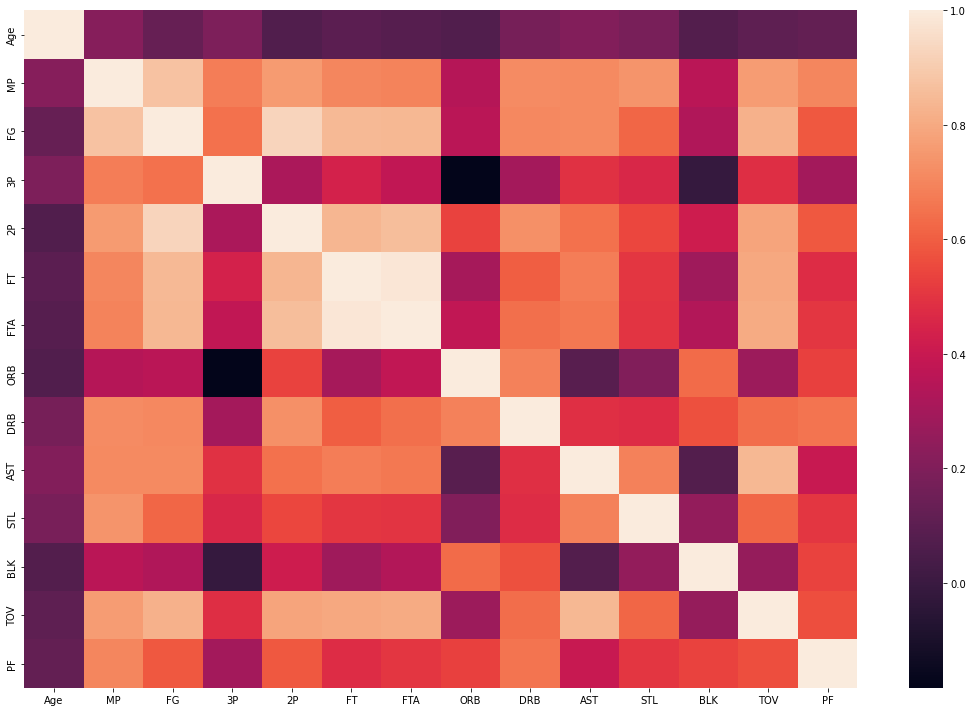

In [37]:
corr = df2.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.tight_layout()
plt.savefig("model2_corr.jpg")


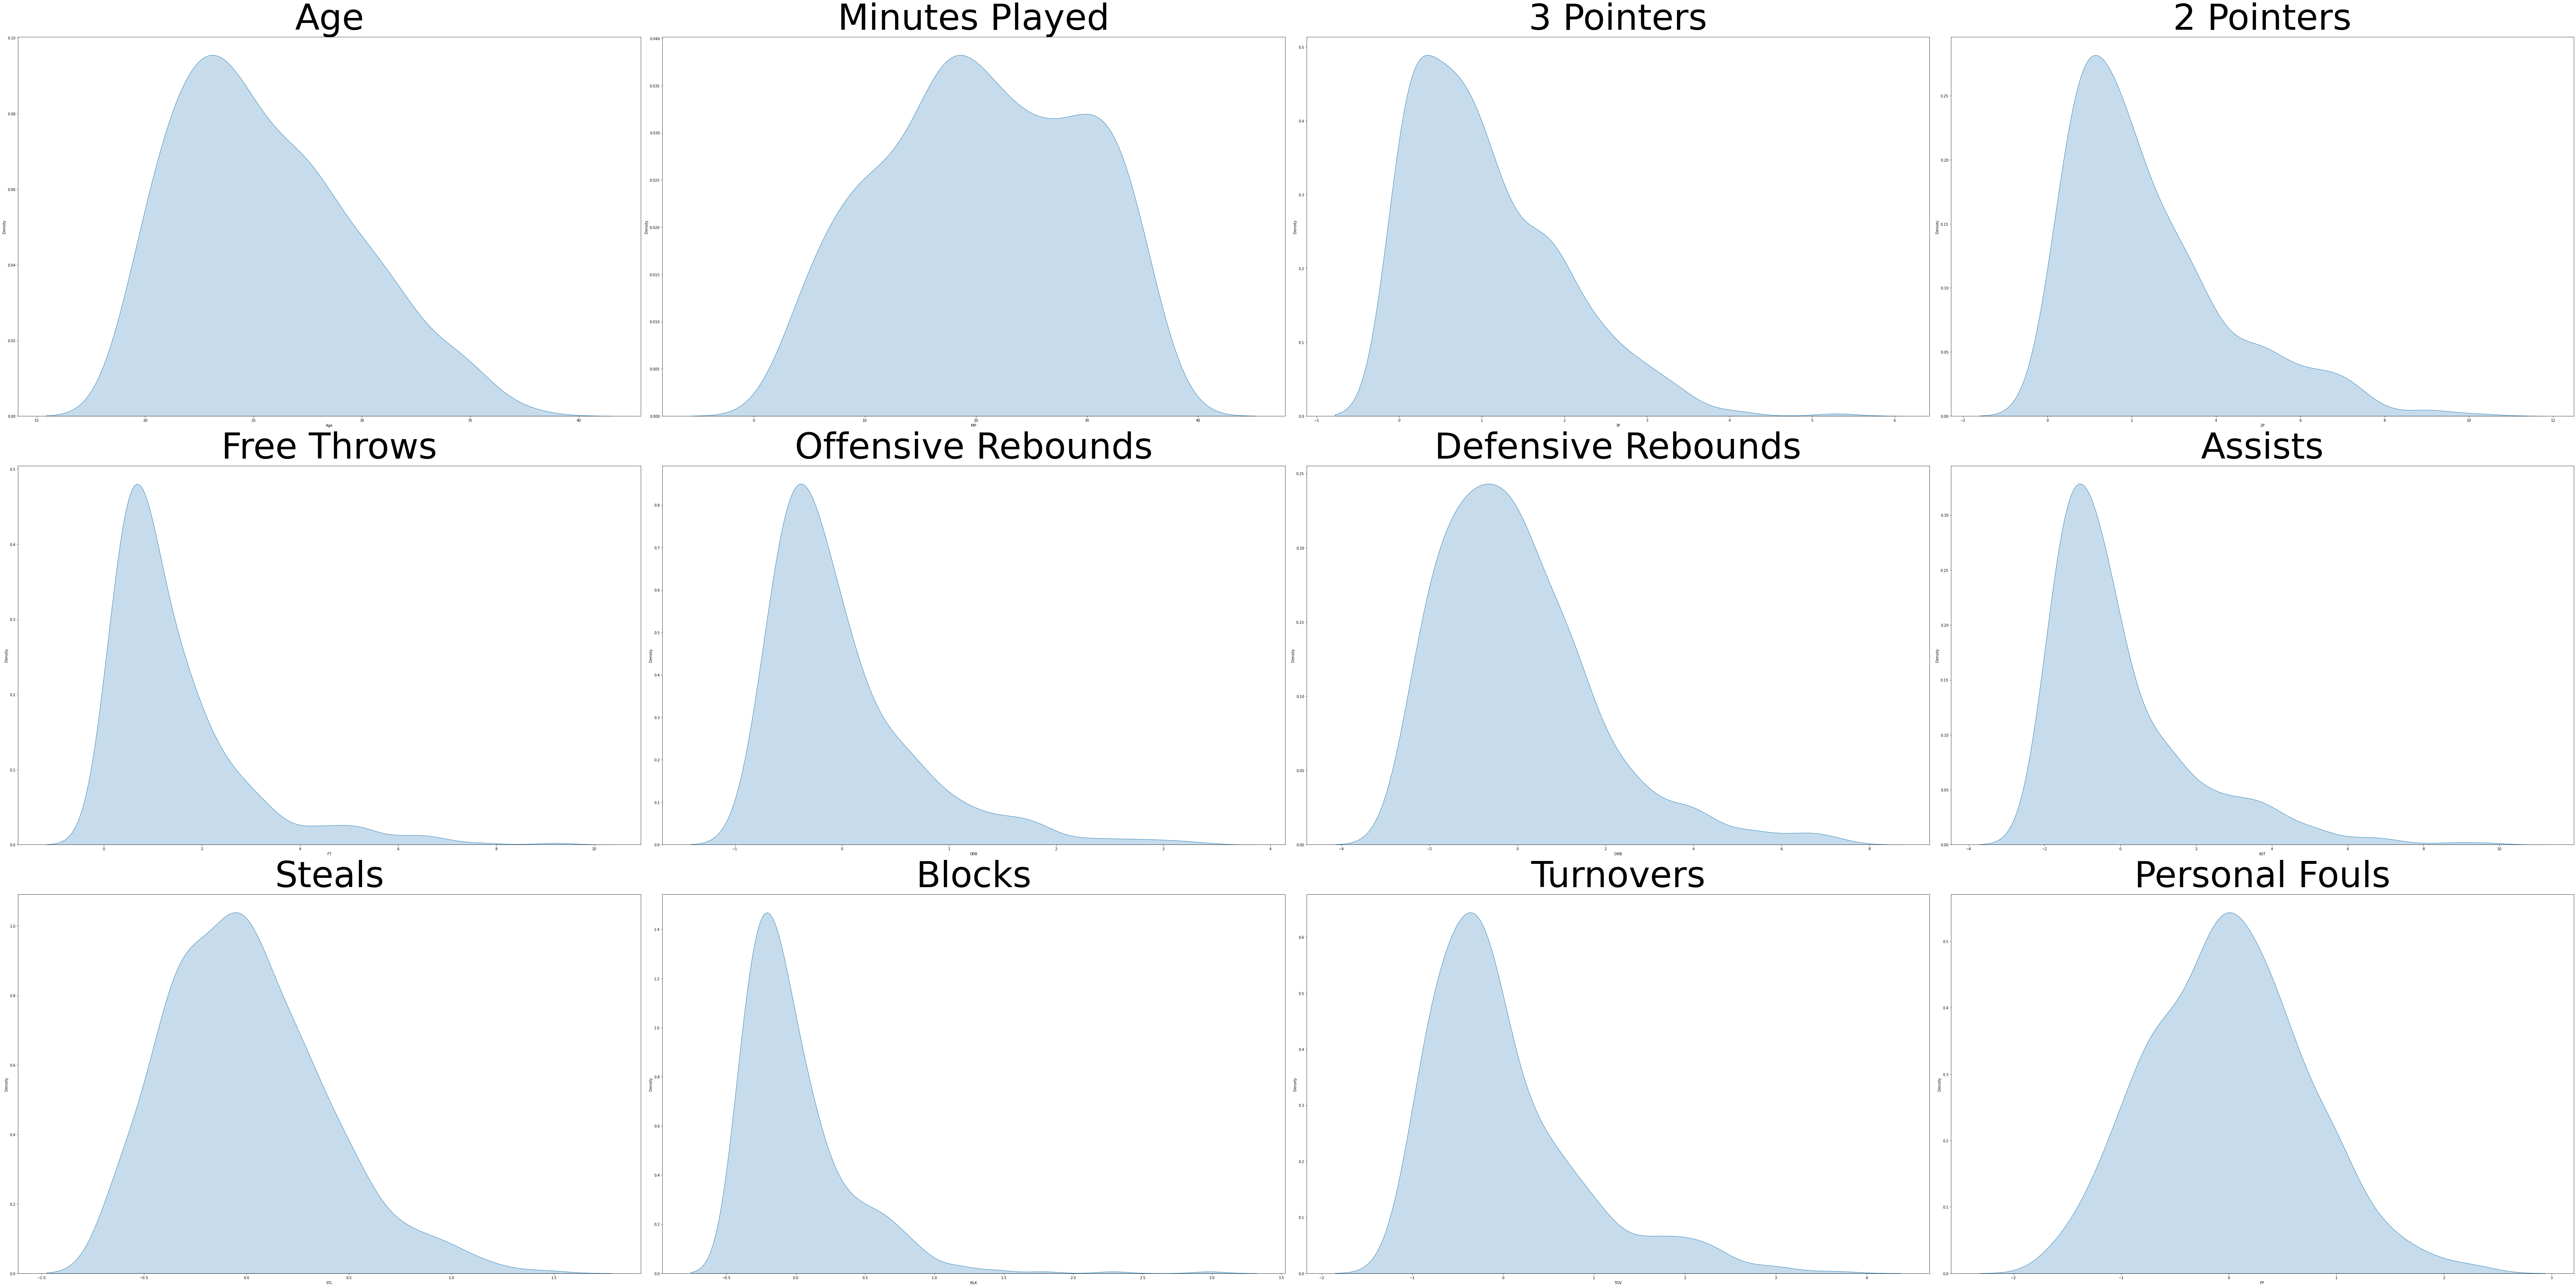

In [38]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 4, figsize = (100, 50))
#Dodam tytuly
a = sns.kdeplot(df2["Age"], shade=True, ax = ax1[0]).set_title("Age", fontsize = 100)
b = sns.kdeplot(df2["MP"], shade=True, ax = ax1[1]).set_title("Minutes Played", fontsize = 100)
c = sns.kdeplot(df2["3P"], shade=True, ax = ax1[2]).set_title("3 Pointers", fontsize = 100)
d = sns.kdeplot(df2["2P"], shade=True, ax = ax1[3]).set_title("2 Pointers", fontsize = 100)
e = sns.kdeplot(df2["FT"], shade=True, ax = ax2[0]).set_title("Free Throws", fontsize = 100)
f = sns.kdeplot(df["ORB"], shade=True, ax = ax2[1]).set_title("Offensive Rebounds", fontsize = 100)
g = sns.kdeplot(df["DRB"], shade=True, ax = ax2[2]).set_title("Defensive Rebounds", fontsize = 100)
h = sns.kdeplot(df["AST"], shade=True, ax = ax2[3]).set_title("Assists", fontsize = 100)
i = sns.kdeplot(df["STL"], shade=True, ax = ax3[0]).set_title("Steals", fontsize = 100)
j = sns.kdeplot(df["BLK"], shade=True, ax = ax3[1]).set_title("Blocks", fontsize = 100)
k = sns.kdeplot(df["TOV"], shade=True, ax = ax3[2]).set_title("Turnovers", fontsize = 100)
l = sns.kdeplot(df["PF"], shade=True, ax = ax3[3]).set_title("Personal Fouls", fontsize = 100)
plt.tight_layout()
plt.savefig("rozkłady_model_2.png")


In [39]:
df2 = df2.drop(['Pos','Tm'], axis=1)

In [40]:
#Data Centralization
df_ind_col=list(df2.columns[1:len(df2.columns)])
df_ind_col

for i in df_ind_col:
    df2[i] = df2[i]-np.mean(df2[i])

df2

,Player,Age,MP,FG,3P,2P,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF
0,Precious Achiuwa,-4.614314,-8.520875,-1.441551,-1.06501,-0.379125,-0.531809,-0.047714,0.380517,-0.713718,-1.602187,-0.345726,0.082903,-0.436382,-0.187674
1,Steven Adams,1.385686,7.079125,-0.141551,-1.06501,0.920875,-0.431809,0.452286,2.880517,2.286282,-0.202187,0.254274,0.282903,0.163618,0.212326
2,Bam Adebayo,-2.614314,12.879125,3.658449,-1.06501,4.720875,2.968191,3.652286,1.380517,3.786282,3.297813,0.554274,0.582903,1.463618,0.612326
3,Ty-Shon Alexander,-3.614314,-17.520875,-3.241551,-0.96501,-2.279125,-1.331809,-1.747714,-0.719483,-2.413718,-1.702187,-0.645726,-0.317097,-0.936382,-1.587674
4,Nickeil Alexander-Walker,-3.614314,1.279125,0.758449,0.63499,0.120875,-0.431809,-0.447714,-0.519483,-0.113718,0.097813,0.354274,0.082903,0.363618,0.212326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Moritz Wagner,-2.614314,-4.620875,-1.141551,-0.36501,-0.779125,0.168191,0.052286,-0.219483,-0.313718,-1.002187,-0.045726,-0.017097,-0.136382,0.712326
499,Brad Wanamaker,5.385686,-3.320875,-1.541551,-0.76501,-0.779125,0.068191,-0.147714,-0.519483,-1.513718,0.797813,0.054274,-0.217097,0.063618,-0.187674
500,Lou Williams,8.385686,0.979125,0.558449,-0.06501,0.620875,0.868191,0.752286,-0.519483,-1.113718,1.297813,0.054274,-0.317097,0.463618,-0.787674
501,D.J. Wilson,-1.614314,-8.220875,-1.541551,-0.16501,-1.279125,-0.931809,-1.147714,-0.219483,-0.313718,-1.402187,-0.345726,0.082903,-0.536382,-0.387674


In [41]:
# Checking for Multicollinearity
#1st cut
df_ind=df2.drop(["Player"], axis='columns')


vif_data = pd.DataFrame()
vif_data["feature"] = df_ind_col

vif_data["VIF"] = [variance_inflation_factor(df_ind.values, i)
                          for i in range(len(df_ind.columns))]

print(vif_data)

   feature          VIF
0      Age     1.146927
1       MP     9.829523
2       FG  2357.773166
3       3P   352.621655
4       2P  1535.755910
5       FT    45.296683
6      FTA    48.948809
7      ORB     3.797285
8      DRB     4.315213
9      AST     5.239956
10     STL     2.708688
11     BLK     2.000692
12     TOV     6.729739
13      PF     2.793551


In [42]:
df2 = df2.drop("FG", axis=1)
df2 = df2.drop("FTA", axis=1)

In [44]:
#2nd cut

df_ind=df2

vif_data2 = pd.DataFrame()
vif_data2["feature"] = df_ind.columns

vif_data2["VIF"] = [variance_inflation_factor(df_ind.values, i)
                          for i in range(len(df_ind.columns))]
vif_data2

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [47]:
df2 = df2.drop(['FG'], axis=1)

KeyError: "['FG'] not found in axis"

In [48]:
df2 = df2.drop(['FTA'], axis=1)

KeyError: "['FTA'] not found in axis"

In [49]:
#3rd cut

#df_ind=df_ind.drop(["FG"], axis='columns')

vif_data3 = pd.DataFrame()
vif_data3["feature"] = df_ind.columns

vif_data3["VIF"] = [variance_inflation_factor(df_ind.values, i)
                          for i in range(len(df_ind.columns))]
vif_data3

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
eigvals = np.linalg.eigvals(df2.corr()) # powinnismy wybrac 3 factors
eigvals

array([6.30943233, 1.93179519, 1.02423916, 0.72857056, 0.54518325,
       0.39458345, 0.3470834 , 0.26778561, 0.0704811 , 0.10405154,
       0.12385979, 0.15293464])

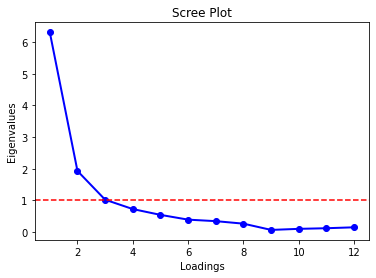

In [51]:
plt.plot(np.arange(start=1, stop=len(eigvals) + 1), eigvals, "o-",linewidth=2, color="blue")
plt.axhline(1, linestyle="--", color="red")
plt.title("Scree Plot")
plt.xlabel("Loadings")
plt.ylabel("Eigenvalues")
plt.savefig("scree_model2")

In [52]:
df2.columns[1:13]

Index(['Age', 'MP', '3P', '2P', 'FT', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF'],
      dtype='object')

In [53]:
corr2 = df2.corr()
n_factors = 3
fa = FactorAnalyzer(rotation="varimax", is_corr_matrix = True, n_factors = n_factors, method = 'ml')
fa.fit(corr2)
loadings = pd.DataFrame(np.column_stack((fa.loadings_, fa.get_uniquenesses())))
loadings.index = df2.columns[1:13]
loadings.columns = [ "Factor" + str(i + 1) for i in range(n_factors)] + ["uniquenesses"] 
loadings

#Proposed name for factor 1: SHORT RANGE SCORING FACTOR
#Proposed name for factor 2: LONG RANGE SCORING FACTOR
#Proposed name for factor 3: NON SCORING FACTOR

,Factor1,Factor2,Factor3,uniquenesses
Age,0.049128,0.064541,0.217947,0.945920
MP,0.531326,0.363101,0.762143,0.004988
3P,0.329489,-0.166916,0.739822,0.316240
2P,0.719102,0.507997,0.247049,0.163799
FT,0.782726,0.266223,0.246862,0.255524
ORB,0.113419,0.931343,-0.066971,0.115251
DRB,0.444668,0.694163,0.301298,0.229627
AST,0.809481,0.012267,0.361337,0.214025
STL,0.485484,0.187624,0.539075,0.438500
BLK,0.081419,0.689504,0.085816,0.510591


In [54]:
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against 
# the identity matrix.

chi_square_value,p_value=calculate_bartlett_sphericity(df2.iloc[:,1:])
kmo_all,kmo_model=calculate_kmo(df2.iloc[:,1:])
print(chi_square_value, p_value)
print(kmo_model)
# The chisqrt is statistically significant thu we can use the Factorial Analysis.
# The KMO value is higher than 0.6 thus we can use the FA.

5274.964205089399 0.0
0.8550684887330434


## Predykcja Wersja 1

In [55]:
df3 = df2
df3.set_index("Player", inplace=True)

In [56]:
df3 = df3.T
df3

Player,Precious Achiuwa,Steven Adams,Bam Adebayo,Ty-Shon Alexander,Nickeil Alexander-Walker,Grayson Allen,Kyle Anderson,Giannis Antetokounmpo,Thanasis Antetokounmpo,Carmelo Anthony,...,Matt Thomas,Sindarius Thornwell,Gary Trent Jr.,P.J. Tucker,Nikola Vučević,Moritz Wagner,Brad Wanamaker,Lou Williams,D.J. Wilson,Delon Wright
Age,-4.614314,1.385686,-2.614314,-3.614314,-3.614314,-0.614314,1.385686,0.385686,2.385686,10.385686,...,0.385686,0.385686,-3.614314,9.385686,4.385686,-2.614314,5.385686,8.385686,-1.614314,2.385686
MP,-8.520875,7.079125,12.879125,-17.520875,1.279125,4.579125,6.679125,12.379125,-10.920875,3.879125,...,-13.420875,-10.320875,10.479125,5.479125,12.879125,-4.620875,-3.320875,0.979125,-8.220875,7.079125
3P,-1.065010,-1.065010,-1.065010,-0.965010,0.634990,1.034990,0.334990,0.034990,-0.965010,0.834990,...,-0.465010,-0.765010,1.734990,-0.265010,1.434990,-0.365010,-0.765010,-0.065010,-0.165010,-0.065010
2P,-0.379125,0.920875,4.720875,-2.279125,0.120875,-1.079125,0.720875,6.820875,-1.279125,0.420875,...,-1.879125,-1.979125,0.320875,-1.879125,4.620875,-0.779125,-0.779125,0.620875,-1.279125,0.420875
FT,-0.531809,-0.431809,2.968191,-1.331809,-0.431809,0.168191,0.668191,5.068191,-1.031809,0.568191,...,-1.131809,-1.231809,-0.031809,-1.031809,0.468191,0.168191,0.068191,0.868191,-0.931809,0.168191
ORB,0.380517,2.880517,1.380517,-0.719483,-0.519483,-0.419483,-0.019483,0.780517,0.080517,-0.319483,...,-0.619483,-0.719483,-0.319483,0.180517,1.280517,-0.219483,-0.519483,-0.519483,-0.219483,0.180517
DRB,-0.713718,2.286282,3.786282,-2.413718,-0.113718,-0.113718,2.086282,6.486282,-1.713718,-0.313718,...,-2.113718,-2.213718,-0.713718,-0.013718,6.686282,-0.313718,-1.513718,-1.113718,-0.313718,0.286282
AST,-1.602187,-0.202187,3.297813,-1.702187,0.097813,0.097813,1.497813,3.797813,-1.302187,-0.602187,...,-1.702187,-1.102187,-0.702187,-0.902187,1.697813,-1.002187,0.797813,1.297813,-1.402187,2.297813
STL,-0.345726,0.254274,0.554274,-0.645726,0.354274,0.254274,0.554274,0.554274,-0.245726,0.054274,...,-0.545726,-0.045726,0.354274,0.154274,0.254274,-0.045726,0.054274,0.054274,-0.345726,0.954274
BLK,0.082903,0.282903,0.582903,-0.317097,0.082903,-0.217097,0.382903,0.782903,-0.217097,0.182903,...,-0.417097,-0.317097,-0.217097,-0.017097,0.282903,-0.017097,-0.217097,-0.317097,0.082903,0.082903


In [57]:
X = loadings.iloc[:, 0:3].values

factors_dict = {}

for player in df3.columns:
    
    y = df3[player].values
    reg = LinearRegression(fit_intercept=False).fit(X, y)
    F1, F2, F3 = reg.coef_
    factors_dict[player] = [F1, F2, F3]
    factors_final = pd.DataFrame(factors_dict)

In [58]:
factors_final_2 = factors_final.T
factors_final_2.columns = ["F1", "F2", "F3"]

In [59]:
factors_final_2.index.name = "Player"
factors_final_2

,F1,F2,F3
Player,,,
Precious Achiuwa,1.422847,-0.141277,-6.008399
Steven Adams,-1.704006,2.780062,3.165127
Bam Adebayo,2.315924,2.244259,3.132800
Ty-Shon Alexander,2.396722,-2.102521,-10.205320
Nickeil Alexander-Walker,0.135098,-0.322526,0.498465
...,...,...,...
Moritz Wagner,0.627342,-0.189241,-2.794522
Brad Wanamaker,0.420117,-0.917209,-1.084610
Lou Williams,0.256307,-0.817591,1.490625


In [60]:
df4 = df3.T
df4 = df4.merge(factors_final_2, on = "Player")
scaler = MinMaxScaler(feature_range=(66, 96))


B1 = eigvals[0]
B2 = eigvals[1]
B3 = eigvals[2]
B_total = B1+B2+B3
B1 = B1/B_total
B2 = B2/B_total
B3 = B3/B_total

df4["Rating"] = B1*df4.F1 + B2*df4.F2 + B3*df4.F3
df4["Rating"] = scaler.fit_transform(df4[["Rating"]])
df4.sort_values("Rating", ascending=False).head(20)
model_2_final = pd.DataFrame(df4["Rating"])

# Porównanie modeli

In [61]:
len(model_2_final)  == len(model_1_final)

True

In [62]:
comparison = model_1_final.merge(model_2_final, left_index=True, right_index=True, how="inner", suffixes=["_Model1", "_Model2"])

In [75]:
comparison["diff"] =  abs(comparison.Rating_Model1  - comparison.Rating_Model2)
comparison.sort_values("Rating_Model1", ascending=False).loc["James Harden"]

Rating_Model1    94.257877
Rating_Model2    91.457310
diff              2.800567
Name: James Harden, dtype: float64

In [64]:
print(np.mean(comparison["diff"].values))

5.134116487048491


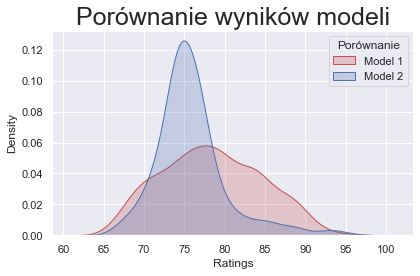

In [65]:
sns.set(style="darkgrid")
fig = sns.kdeplot(comparison["Rating_Model1"], shade=True, color="r")
fig = sns.kdeplot(comparison["Rating_Model2"], shade=True, color="b")
plt.legend(title = "Porównanie", loc = "upper right", labels = ["Model 1", "Model 2"])
plt.xlabel("Ratings")
plt.title("Porównanie wyników modeli", fontsize=25)
plt.tight_layout()
plt.savefig("porównanie_kde.png")

In [66]:
fig =sns.swa

AttributeError: module 'seaborn' has no attribute 'swa'